In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])

In [2]:
X_train,X_test,y_train,y_yest=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

y_train_pred=lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)

In [5]:
print("GOOD FIT (Linear Regression)")
print("Train MSE:",mean_squared_error(y_train,y_train_pred))
print("Train R2:",r2_score(y_train,y_train_pred))

GOOD FIT (Linear Regression)
Train MSE: 1.875
Train R2: 0.9657142857142857


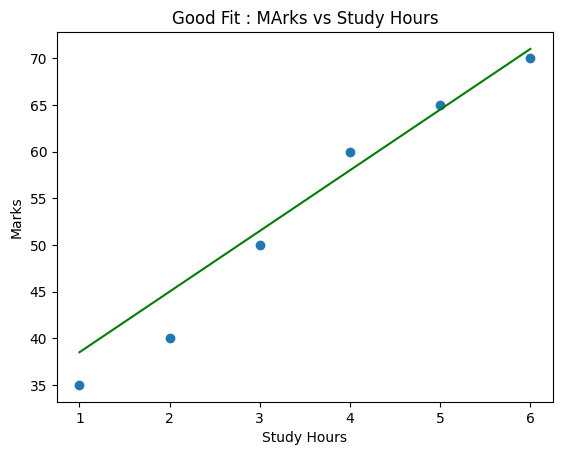

In [7]:
plt.scatter(X,y)
plt.plot(X, lin_reg.predict(X), color='green')
plt.title("Good Fit : MArks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [8]:
poly=PolynomialFeatures(degree=5)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

overfit_model=LinearRegression()
overfit_model.fit(X_train_poly,y_train)
y_train_poly_pred=overfit_model.predict(X_train_poly)
y_test_poly_pred=overfit_model.predict(X_test_poly)

In [15]:
print("OVERFITTING (Polynomial Regression Degree 5)")
print("Train MSE:",mean_squared_error(y_train, y_train_poly_pred))
print("Train R2 : ",r2_score(y_train, y_train_poly_pred))

OVERFITTING (Polynomial Regression Degree 5)
Train MSE: 8.23880018525583e-24
Train R2 :  1.0


In [16]:
poly=PolynomialFeatures(degree=5)
X_poly=poly.fit_transform(X)

In [17]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(X_poly,y)
y_ridge_pred=ridge.predict(X_poly)

In [18]:
print("After Regularization (Ridge Regression)")
print("Ridge MSE:",mean_squared_error(y, y_ridge_pred))
print("Ridge R2 : ",r2_score(y, y_ridge_pred))

After Regularization (Ridge Regression)
Ridge MSE: 0.24058058055628095
Ridge R2 :  0.9985320506949108


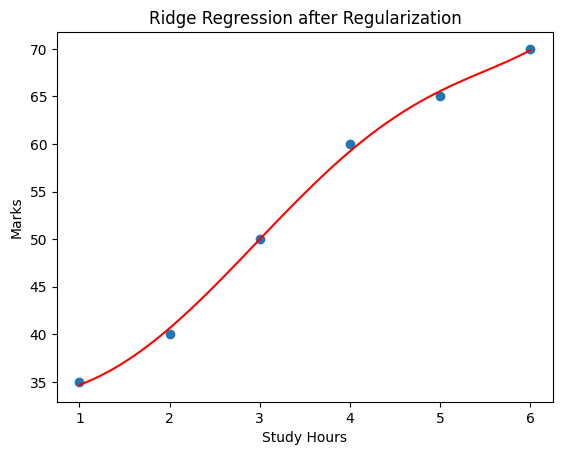

In [19]:
X_grid=np.linspace(1,6,100).reshape(-1,1)
X_grid_poly=poly.transform(X_grid)
plt.scatter(X,y)
plt.plot(X_grid, ridge.predict(X_grid_poly), color='red')
plt.title("Ridge Regression after Regularization")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_poly,y)
y_lasso_pred=lasso.predict(X_poly)

C:\Users\Bhava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [22]:
print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R2 :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred))
print("Lasso R2 :", r2_score(y, y_lasso_pred))

Ridge MSE: 0.24058058055628095
Ridge R2 : 0.9985320506949108

Lasso MSE: 0.7727384155729596
Lasso R2 : 0.9952849859388768
